In [3]:
%load_ext autoreload
%autoreload 2
import hippo
from rich import print
import pandas as pd
from pathlib import Path
import mrich

In [4]:
animal = hippo.HIPPO("RdRp_FFF", "../../BulkDock/TARGETS/Flavi_NS5_RdRp/Flavi_NS5_RdRp.sqlite")
# animal = hippo.HIPPO("RdRp_FFF", "bulkdock_snapshot.sqlite", copy_from="../../BulkDock/TARGETS/Flavi_NS5_RdRp/Flavi_NS5_RdRp.sqlite", overwrite_existing=True)

 Creating HIPPO animal

name = RdRp_FFF

db_path = ../../BulkDock/TARGETS/Flavi_NS5_RdRp/Flavi_NS5_RdRp.sqlite

DEBUG: hippo.Database.__init__()

DEBUG: Database.path = ../../BulkDock/TARGETS/Flavi_NS5_RdRp/Flavi_NS5_RdRp.sqlite

DEBUG: hippo.Database.connect()

DEBUG: sqlite3.version='2.6.0'

 Success  Database connected @ ../../BulkDock/TARGETS/Flavi_NS5_RdRp/Flavi_NS5_RdRp.sqlite!

 Success  Initialised animal HIPPO("RdRp_FFF")!

## Get Enamine catalogue quotes

In [81]:
quoted1 = animal.add_enamine_quote("../quotes/DF_curated_and_manual_and_AC_curated_enamine.xlsx", orig_name_col=None)
quoted1.compounds.poses.add_tag("Enamine_Quote_1970815")

Tagged {P × 900} w/ "Enamine_Quote_1970815"

In [82]:
quoted2 = animal.add_enamine_quote("../quotes/LCD_curated_enamine1.xlsx", orig_name_col=None)
quoted2.compounds.poses.add_tag("Enamine_Quote_1977854")

Tagged {P × 596} w/ "Enamine_Quote_1977854"

In [29]:
# quoted = quoted1 + quoted2
quoted = quoted2

C341 "WZRAVWCMDRGDQR-UHFFFAOYSA-N"


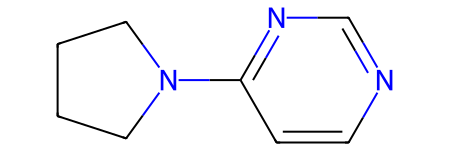

Output()

In [6]:
# print(len(quoted))
quoted.interactive()

In [24]:
pose_lookup = animal.db.get_compound_id_pose_ids_dict(quoted.compounds)

data = []
for ingredient in mrich.track(quoted):
    quote = ingredient.quote
    compound = ingredient.compound
    d = dict(
        comp_id=compound.id,
        smiles=quote.smiles,
        quote_id=quote.id,
        quote_entry=quote.entry,
        quote_price_USD=quote.price.amount,
        quote_amount_mg=quote.amount,
        quote_catalogue=quote.catalogue,
    )

    pose_ids = pose_lookup.get(compound.id)

    if not pose_ids:
        mrich.warning("no poses for", compound)

    else:
        poses = animal.poses[pose_ids]
    
        tags = set(poses.tags)
        d["tags"] = "; ".join(tags)
        
    data.append(d)
    
    # break

df = pd.DataFrame(data)
df

Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:07:35 0:00:00 {}

,comp_id,smiles,quote_id,quote_entry,quote_price_USD,quote_amount_mg,quote_catalogue,tags
0,6748,C=C(C(=O)OC)C(O)C=1C=CN=CC1,736.0,Z320967548,38.0,5.0,Legacy,Knitwork impure merge; Fragmenstein placed; ac...
1,55996,CC=1C=C(NC(=O)NC[C@@H](C)O)N(N1)C=2C=CC=CC2,NaN,Z1563517098,$396.00 USD,15.0,sRDB,LCD curated YES; Fragmenstein placed; acceptab...
2,40809,COC=1C=CC=2C(=COC2C1)CC(=O)OCC(=O)C3=CNC=4C=CC...,738.0,Z25278747,38.0,5.0,Legacy,Fragmenstein placed; acceptable; Green Site/RN...
3,30876,CC=1C=CC(NC(=O)C=2C=CC=NC2)=C3C=CC=NC13,739.0,Z284853590,38.0,5.0,Legacy,Fragmenstein; acceptable; RdRp_knitwork_green_...
4,45327,C[C@H](O)CNC(=O)NC1=CC=CN=C1N2CCCC2,NaN,Z1563511699,$396.00 USD,15.0,sRDB,LCD curated YES; Fragmenstein placed; acceptab...
...,...,...,...,...,...,...,...,...
196,60687,CC=1OC=2C=CC=CC2C1C(=O)OCC=3C=CN4N=CN=C4C3,NaN,Z9471938654,$264.00 USD,10.0,sRDB,LCD curated YES; Knitwork impure merge; Fragme...
197,60663,C1=CC=2C=C(C=CC2O1)CNC=3C=CC4=NC=NN4C3,NaN,Z9471938662,$264.00 USD,10.0,sRDB,LCD curated YES; Knitwork impure merge; Fragme...
198,65250,CC(C)(CS(=O)(=O)N1CCCC=2C=CC=CC21)C(F)F,NaN,Z3402390089,$394.00 USD,10.0,mRDB,LCD curated YES; Knitwork impure merge; Fragme...
199,30433,C1=CC=2N=C(C=CC2O1)CNC3(CC3)C=4C=CC=CN4,NaN,Z4482242894,$394.00 USD,10.0,mRDB,Fragmenstein; acceptable; RdRp_knitwork_green_...


In [31]:
sets = {}
for tag in [t for t in animal.tags.unique if "curated" in t and not "NO" in t]:
    sets[tag] = set(animal.poses(tag=tag).ids)
sets

{'LCD curated YES': {94487,
  94533,
  95738,
  95763,
  95957,
  95988,
  96212,
  98190,
  98289,
  98391,
  98483,
  98948,
  99180,
  99305,
  103145,
  104762,
  105979,
  106018,
  106073,
  106992,
  107167,
  111041,
  117872,
  119535,
  119882,
  120043,
  120261,
  120695,
  120774,
  124263,
  124588,
  126992,
  129038,
  130431,
  130458,
  132202,
  133849,
  134194,
  134256,
  134267,
  134566,
  134697,
  144119,
  144594,
  156338,
  165490,
  166297,
  166625,
  168974,
  173200,
  173663,
  174899,
  175443,
  175618,
  176802,
  177284,
  178056,
  178100,
  178795,
  178866,
  180920,
  183500,
  183615,
  184490,
  185286,
  185607,
  185725,
  185894,
  186031,
  186233,
  190746,
  196606,
  199035,
  199053,
  203866,
  205083,
  205230,
  206727,
  206758,
  206805,
  206909,
  208608,
  214592,
  218154},
 'LCD curated INTERESTING': {94487,
  94533,
  95738,
  95957,
  95988,
  96212,
  98289,
  98391,
  98483,
  98948,
  99180,
  99305,
  103145,
  107167,

In [23]:
data_orig = data.copy()
df_orig = df.copy()

In [26]:
counts = dict(YES=[], NO=[], INTERESTING=[])
for i,row in df.iterrows():
    # print(row.tags)

    if isinstance(row.tags, float):
        counts["YES"].append(0)
        counts["NO"].append(0)
        counts["INTERESTING"].append(0)
    else:

        counts["YES"].append(row.tags.count("curated YES"))
        counts["NO"].append(row.tags.count("curated NO"))
        counts["INTERESTING"].append(row.tags.count("curated INTERESTING"))
        
    # break

df["#curated YES"] = counts["YES"]
df["#curated NO"] = counts["NO"]
df["#curated INTERESTING"] = counts["INTERESTING"]

In [28]:
df.to_csv("../curation/combined_curated_annotated_20250114.csv",index=False)

## Build dataframe from tag info

In [101]:
pose_ids = set()
for tag in [t for t in animal.tags.unique if "curated" in t and not "NO" in t]:
    for i in animal.poses(tag=tag).ids:
        pose_ids.add(i)

In [102]:
records = animal.db.select_where(table='tag', query="tag_name, tag_pose", key=f"tag_pose IN {animal.poses[pose_ids].str_ids}", multiple=True)
tag_lookup = {}
for tag_name, tag_pose in records:
    if tag_pose not in tag_lookup:
        tag_lookup[tag_pose] = set()
    
    if "curated" not in tag_name and "Enamine_" not in tag_name:
        continue
    
    tag_lookup[tag_pose].add(tag_name)

In [103]:
c_data = []
for pose in mrich.track(animal.poses[pose_ids]):
    c = pose.compound
    quotes = c.get_quotes()
    d = dict(compound=c.id, smiles=c.smiles)
    if quotes:

        q = quotes[0]
        
        # d["quote"] = quotes[0]

        d.update(dict(
            smiles=q.smiles,
            quote_id=q.id,
            quote_entry=q.entry,
            quote_price_USD=q.price.amount,
            quote_amount_mg=q.amount,
            quote_catalogue=q.catalogue,
        ))

    else:

        d.update(dict(
            quote_id=None,
            quote_entry=None,
            quote_price_USD=None,
            quote_amount_mg=None,
            quote_catalogue=None,
        ))


    tags = tag_lookup.get(pose.id, set())

    if tags:
        for tag in tags:
            d[tag] = True
    
    # print(c.get_quotes(df=True))
    # print(d)
    c_data.append(d)
    
    # break

Output()

In [104]:
df2 = pd.DataFrame(c_data)#.fillna(value=None)
df2

,compound,smiles,quote_id,quote_entry,quote_price_USD,quote_amount_mg,quote_catalogue,Enamine_unavailable,JA curated YES,DF curated NO,...,Enamine_Quote_1977854,Enamine_Quote_1970815,Enamine_Order_1968912,AC curated YES,DF curated YES,JA curated MAYBE,JA curated INTERESTING,JA curated NO,LCD curated YES,LCD curated INTERESTING
0,734,CC(C)n1cc(NC2=NCCCS2)cn1,NaN,None,NaN,NaN,None,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,743,CC(Cn1cccn1)NC1=NCCCS1,NaN,None,NaN,NaN,None,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,778,CCS(=O)(=O)NCC=1C=CC(=NC1)N2CCCC=3C=CC=CC32,1169.0,Z4278175298,132.0,5.0,sRDB,NaN,NaN,NaN,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,890,CCS(=O)(=O)NCC=1C=CN=CC1Cl,974.0,Z2680349149,144.0,5.0,sRDB,NaN,True,NaN,...,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,897,CCS(=O)(=O)NCC=1C=CC(=CC1)OCC=2C=CC=CN2,1118.0,Z805640618,48.0,5.0,HTS,NaN,True,NaN,...,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,31409,O=C(NC=1C=CC(OC(F)F)=C2N=CC=CC12)C=3C=CC=CN3,1135.0,Z775226296,132.0,5.0,sRDB,NaN,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
339,59282,O=C1COc2c1cccc2-c1csc(C(F)(F)F)n1,NaN,None,NaN,NaN,None,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
340,60673,O=C1CCC(CCNC(=O)C2CC(=O)c3ccccc3O2)N1,NaN,None,NaN,NaN,None,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
341,60663,C1=CC=2C=C(C=CC2O1)CNC=3C=CC4=NC=NN4C3,1193.0,Z9471938662,132.0,5.0,sRDB,NaN,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN


In [105]:
counts = dict(YES=[], NO=[], INTERESTING=[])
for i,row in df2.iterrows():
    # print(row.tags)

    d = row.to_dict()

    counts["YES"].append(len([_ for k,v in d.items() if "curated YES" in k and v == True]))
    counts["NO"].append(len([_ for k,v in d.items() if "curated NO" in k and v == True]))
    counts["INTERESTING"].append(len([_ for k,v in d.items() if "curated INTERESTING" in k and v == True]))
    
    # break

df2["#curated YES"] = counts["YES"]
df2["#curated NO"] = counts["NO"]
df2["#curated INTERESTING"] = counts["INTERESTING"]

df2.to_csv("../curation/combined_curation_quotes_20250114.csv")
df2.to_excel("../curation/combined_curation_quotes_20250114.xlsx")

In [106]:
row

compound                                          49938
smiles                     C1=NC=2C(=CC=CC2O1)C3=CSC=N3
quote_id                                         1191.0
quote_entry                                 Z9471938651
quote_price_USD                                   132.0
quote_amount_mg                                     5.0
quote_catalogue                                    sRDB
Enamine_unavailable                                 NaN
JA curated YES                                      NaN
DF curated NO                                       NaN
AC curated INTERESTING                              NaN
DF curated INTERESTING                              NaN
Enamine_Quote_1977854                              True
Enamine_Quote_1970815                               NaN
Enamine_Order_1968912                               NaN
AC curated YES                                      NaN
DF curated YES                                      NaN
JA curated MAYBE                                

In [109]:
# df2[df2["Enamine_unavailable"] == True]
df2

,compound,smiles,quote_id,quote_entry,quote_price_USD,quote_amount_mg,quote_catalogue,Enamine_unavailable,JA curated YES,DF curated NO,...,AC curated YES,DF curated YES,JA curated MAYBE,JA curated INTERESTING,JA curated NO,LCD curated YES,LCD curated INTERESTING,#curated YES,#curated NO,#curated INTERESTING
0,734,CC(C)n1cc(NC2=NCCCS2)cn1,NaN,None,NaN,NaN,None,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0
1,743,CC(Cn1cccn1)NC1=NCCCS1,NaN,None,NaN,NaN,None,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
2,778,CCS(=O)(=O)NCC=1C=CC(=NC1)N2CCCC=3C=CC=CC32,1169.0,Z4278175298,132.0,5.0,sRDB,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
3,890,CCS(=O)(=O)NCC=1C=CN=CC1Cl,974.0,Z2680349149,144.0,5.0,sRDB,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1
4,897,CCS(=O)(=O)NCC=1C=CC(=CC1)OCC=2C=CC=CN2,1118.0,Z805640618,48.0,5.0,HTS,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,31409,O=C(NC=1C=CC(OC(F)F)=C2N=CC=CC12)C=3C=CC=CN3,1135.0,Z775226296,132.0,5.0,sRDB,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,0,0,1
339,59282,O=C1COc2c1cccc2-c1csc(C(F)(F)F)n1,NaN,None,NaN,NaN,None,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,0,0,1
340,60673,O=C1CCC(CCNC(=O)C2CC(=O)c3ccccc3O2)N1,NaN,None,NaN,NaN,None,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,0,0,1
341,60663,C1=CC=2C=C(C=CC2O1)CNC=3C=CC4=NC=NN4C3,1193.0,Z9471938662,132.0,5.0,sRDB,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,1,0,0


## Register unavailable compounds

## Unavailable compounds

In [98]:
# from DF_curated and LCD_quote, and JA_order

unavailable = ["CCCOCC(O)C1=CC=CN=C1",
"C=1C=NC=C(C1)NC=2C=CC=3C=CC=CC3N2",
"C=C(CN1C=CN=C1)C(=O)NC(CO)CC=2C=CC=NC2",
"CC(NC=1C=CC=C(N1)C2CC2)C3=CN=CS3",
"CC(C)(C)OCC(O)C1=CC=CC=N1",
"CCCC(C(=O)NC=1C=CN=CC1)C=2C=CC=CN2",
"CSCC(C)CNC(C)C1=CN(C)N=C1C2CCOCC2",
"NCC1=CSC(=N1)C=2C=CC(=O)NN2",
"CC(CN1C=CC=N1)NC2=NCCCS2",
"CCC1OCCC1CNCC=2C=CNN2",
"CCNC(CC=1C=CN=CC1)C=2C=CC=CN2",
"COC=1C=C(C=C2NC=CC12)CC3CCNC3",
"COC=1C=CC(=NC1N2C=CC=C2)C(=O)NS(C)(=O)=O",
"CC=1C=C(CN2N=C(C=CC2=O)C=3C=NC=C(F)C3)ON1",
"CC(C)(C)OCC(O)C1=CSC=N1",
"O=C(O)C1=CSC(=N1)C=2C=CC(=O)NN2",
"CC1=CNC(=N1)N2CCCC3=CC=CC=C32",
"N#CC1=CC=C(N1)C2=NC=CS2",
"N#CC=1C=CC(=NC1C2CC2)C3=CSC=N3",
"COC(=O)C=1NC(=CC1C=2C=NNC2)C(C)C",
"CCS(=O)(=O)NCC1CCCN(CC=2C=CC=C3C=CC=CC23)C1",
"CCS(=O)(=O)NCC1CN(CC2=CN=CN21)C=3N=CC(F)=CN3",
"CN1C=NC=C1C2=NN=C(O2)C3CCCCN3",
"CNC=1C=CN=C(C1)NCC2=CN=CS2",
"C1=CSC(CC=2C=CC=3CCCNC3C2)=N1",
"CCC1(CCCO1)C(N)C2=CN=CS2",
"OC1COCC1CNCC2=CC=NN2",
"CC=1C=NC(=C(C1)OC=2CN=NC2C=3C=CN=CC3)N4C=CC(C#CCO)=C4",
"C1=NC(=CN1)C2=NNC=3CCCCC23",
"O=C1C=C(CCCC1)C2=CC=CC=N2",
"CC(C)(C)OCC(O)C=1C=CN=CN1",
"CCOC(=O)CC(C)OC(=O)C1=CC=NN1C=2C=CN=CC2",
"CC(N1N=C(N=C1C=2C=CNC2)C3=CN=CS3)C(F)(F)F",
"CC(C)C=1NC=CC1C(=O)NCCN(CCO)C(=O)C=2C=CN=CC2",
"CCN(CCNC(=O)C=1C=CN=CC1)C(=O)C=2C=CNC2C(C)C",
"COC=1C=CC=2C=C(CN)NC2C1NC(C)=O",
"CN(C=1N=CC=C2C=C(F)C=CC12)S(N)(=O)=O",
"COC=1C=CC=C(C1)S(=O)(=O)NC(=O)C=2C=C(C3=CC=C(C#CCO)S3)C(=CC2OC)C(C)C4=CNN=C4C=5C=CN=CC5",
"CC=1C=C(C(=CC1C(=O)NS(C)(=O)=O)C2=CC=C(C#CCO)S2)C(C)C3=CNN=C3C=4C=CN=CC4",
"O=C(NC=1C=CN(C1)CC=2C=CC=NC2)C3CCCO3",
"CC=1SC(=C(C)C1CCNC=2C=CN(C2)CC=3C=CC=NC3)C(C)NC(=O)C(C)C",
"C=1C=CN(C1)C=2N=CC=CC2NC=3C=CN(C3)CC=4C=NC=CC4",
"O=C(NC=1C=CC(=CN1)CC=2C=CC=NC2)C3CCCO3",
"CC1=NC=C(CC2=CC=C(N=C2)NC(=O)C3CCCO3)S1",
"COC=1C(=CC(=CC1C2=CC=C(C#CCO)S2)CC(=O)O)CC(=O)O",
"O=C(O)CC1=CC(=CC(=C1)C=2C=CC=CC2)C(C(=O)O)C3=CC(=NN3)C=4C=CN=CC4",
"NC=1C(=CC(=CC1C=2C=CC=CC2)CC(=O)O)CC(=O)O",
"CC=1C=C2C=CC=C(NCC3CCNC3)N2N1",
"NC1=NC(=CS1)C=2C=CC(=CC2)N(CC(=O)N3CCOCC3)C4CCCCC4",
"CCC1=C(O)NN=C1NCC2=CC=C3OCOC3=C2",
"CC=1C=C(CN2NC=3CCCCC3C2=O)ON1",
"N#CC=1C=CC(=CC1O)CN2C=NC=3C=CC=CC32",
"NC=1C=CC=NC1N2C=CC(C#CCO)=C2",
"COC=1C=CC=NC1N2C=CC(C#CCO)=C2",
"CNC=1C=CC=NC1N2C=CC(C#CCO)=C2",
"[Na+].[Na+].COC1=C(C=C(CC([O-])=O)N=C1N2C=CC(C#CCO)=C2)CC([O-])=O",
"COC=1C=CC(=NC1N2C=CC(C#CCO)=C2)C(=O)NS(C)(=O)=O",
"COC=1C=C(C)C=NC1N2C=CC(C#CCO)=C2",
"COC=1C=C(C)C(=NC1N2C=CC(C#CCO)=C2)C(=O)NS(=O)(=O)C=3C=CC=C4C=CC=NC34",
"COC=1C=CC(=NC1N2C=CC(C#CCO)=C2)C(=O)NS(=O)(=O)C=3C=CC=C4C=CC=NC34",
"CNC=1C=CC(=NC1N2C=CC(C#CCO)=C2)C(=O)NS(=O)(=O)C=3C=CC=C4C=CC=NC34",
"COC=1C=C(C)C(=NC1N2C=CC(C)=C2)C(=O)NS(=O)(=O)C=3C=CC=C4C=CC=NC34",
"COC=1C=C(C)C(=NC1N2C=CC(C)=C2)C(=O)NS(C)(=O)=O",
"CC=1C=NC(=C(C1)NC=2CN=NC2C=3C=CN=CC3)N4C=CC(C#CCO)=C4",
"CC=1C=CC(C2=CC=C(C#CCO)S2)=C(C1)NC=3CN=NC3C=4C=CN=CC4",
"CC=1C=CC(C2=CC=C(C#CCO)S2)=C(C1)OC=3CN=NC3C=4C=CN=CC4",
"CC=1C=NC(=C(C1)OC=2C=CN(C2)CC=3C=CC=NC3)N4C=CC(C#CCO)=C4",
"CC=1C=NC(=C(C1)NC=2C=CN(C2)CC=3C=CC=NC3)N4C=CC(C#CCO)=C4",
"CC=1C=CC(C2=CC=C(C#CCO)S2)=C(C1)NC=3C=CN(C3)CC=4C=CC=NC4",
"CC=1C=CC(C2=CC=C(C#CCO)S2)=C(C1)OC=3C=CN(C3)CC=4C=CC=NC4",
"NC=1C(=CC=NC1N2C=CC=C2)C3=CNC=N3",
"NC(=O)N1CCN(CC1)C=2C=CC=NC2N3C=CC=C3",
"C=1C=CN(C1)C=2N=CC=C3N=C(NC23)N4CCNCC4",
"C=1C=CN(C1)C=2N=CC=C3CC(=NC23)N4CCNCC4",
"C=1C=CN(C1)C=2N=CC=C3SC(=NC23)N4CCNCC4",
"C=1C=CN(C1)C=2N=CC=C3OC(=NC23)N4CCNCC4",
"NC(=O)N1CCN(CC1)C(=O)C=2C=CC=NC2N3C=CC=C3",
"C=1C=CN(C1)C=2C=C(C=CN2)C=3C=NNC3C=4C=CN=CC4",
"C=1C=CN(C1)C=2N=CC=CC2C=3C=CN(C3)CC=4C=CC=NC4",
"NC=1C(=CC=NC1N2C=CC=C2)C=3C=NNC3C=4C=CN=CC4",
"NC(=O)N1CCN(CC1)C2=NC=3C(=NC=CC3O2)N4C=CC=C4",
"NC(=O)N1CCN(CC1)C2=NC=3C(=NC=CC3S2)N4C=CC=C4",
"C=1C=CN(C1)C=2N=CC=CC2NCC3=CNN=C3C=4C=CN=CC4",
"C=1C=CN(C1)C=2N=CC=CC2CNC=3C=NNC3C=4C=CN=CC4",
"C=1C=CN(C1)C=2N=CC=CC2CCC3=CNN=C3C=4C=CN=CC4",
"C=1C=CN(C1)C=2N=CC=CC2CSC3=CNN=C3C=4C=CN=CC4",
"C=1C=CN(C1)C=2N=CC=CC2SCC=3C=NNC3C=4C=CN=CC4",
"C=1C=CN(C1)C=2N=CC=CC2COC=3C=NNC3C=4C=CN=CC4",
"C=1C=CN(C1)C=2N=CC=CC2OCC3=CNN=C3C=4C=CN=CC4",
"CCS(=O)(=O)NCC1=CC=C(N=C1)NC2CCOCC2",
"CCS(=O)(=O)NCC1=CC=C(N=C1)OC2CCOCC2",
"CCS(=O)(=O)NCC1=CC=C(CC2CCOCC2)N=C1",
"CNS(=O)(=O)C=1C=CC=C2C(=O)N(CC3=CC(C)=NO3)N=C(C)C12",
"NC1=NC(=CS1)C=2C=CC(=CC2)NC3=CC=C(S3)C=4C=C(C=C(C4)CC(=O)O)CC(=O)O",
"CC(=O)NCCN(CC=1C=CSC1)C(=O)C=2C=NC=CC2O",
"NC=1C=NC=CC1NCC2=CN=CS2",
"CC(=CC=1C=CC=CN1)C(=O)N(C)C2(CCOC2)C(=O)O",
"CN1CCCC=2C=CC(=CC21)NS(=O)(=O)C3=CN=CS3",
"CC(C)N1C=C(C=N1)NC2=NCCCS2",
"CCS(=O)(=O)NCC1=CC=C(C=CC(=O)O)S1",
"CCS(=O)(=O)NCC1CC(=O)N(C1)C=2C=CC(C)=CC2",
"CC1=NC=C(NC(=C2CCNN2)C=3C=CC=C(F)C3)S1",
"CC1=CNN=C1C=2C=CC=C(N2)NC(=O)C3CCCO3",
"O=C(NC=1C=C2C=NC=CC2=CN1)C3CCCO3",
"O=C(NC=1C=C2C=NC=C(O)C2=CN1)C3CCCO3",
"NC=1C=NC=C2C=C(N=CC12)NC(=O)C3CCCO3",
"NC=1C=C2C=NC(=CC2=CN1)NC(=O)C3CCCO3",
"O=C(NC=1C=C2C=NC(O)=CC2=CN1)C3CCCO3",
"[Cl-].O=C(NC1=CC=2C=NC(O)=CC2C=N1)C3CCC[NH2+]3",
"[Cl-].O=C(NC1=CC=2C=NC(O)=CC2C=N1)C3C[NH2+]CO3",
"O=C(NC=1C=C2C=NC(O)=CC2=CN1)C3CCNO3",
"C=C(NC=1C=C2C=NC(O)=CC2=CN1)C3CCNO3",
"C=C(NC=1C=C2C=NC(N)=CC2=CN1)C3CCNO3",
"NC(=O)OC=1C=C2SC(=O)OC2=CC1N",
"NC(=O)OC=1C=C2SC(OC2=CC1N)C3CCCO3",
"NC(=O)OC=1C=C2SC(C=C3CCNO3)OC2=CC1N",
"NC(=O)OC=1C=C2SC(CC3CCNO3)OC2=CC1N",
"CC1=NC=C(S1)C(=O)OC=2C=C3SC(C=C4CCNO4)OC3=CC2N",
"CC1=NC=C(S1)C(=O)OC=2C=C3SC(C=C4CCNO4)OC3=CC2O",
"CC1=NC(=CN1)C(=O)OC=2C=C3SC(C=C4CCNO4)OC3=CC2O",
"[Na+].COC1C(CC(CC1C([O-])=O)C2=CC=CS2)OC=3C=CC(=CC3)OC(C)=O",
"[Na+].COC1C=2C=3C=CC(=CC3SC2C(CC1C([O-])=O)C4=CC=CS4)OC(C)=O",
"[Na+].COC1C(CC(C2=CC=CS2)C3SC=4C=C(C=CC4C13)OC(C)=O)C([O-])=O",
"[Na+].COC1C(CC(C2=CC=CS2)C3SC=4C=C(C=CC4OC13)OC(C)=O)C([O-])=O",
"COC1CC(CC[NH+]2CCN(CC2)C(N)=O)C(CC1C([O-])=O)C3=CC=CS3",
"[Na+].COC1CC(ON2CCN(CC2)C(N)=O)C(CC1C([O-])=O)C3=CC=CS3",
"COC1CC(OC[NH+]2CCN(CC2)C(N)=O)C(CC1C([O-])=O)C3=CC=CS3",
"[Na+].COC1CC(CCC1C([O-])=O)C=2C=C(F)C=C(C2)NCC3=CN=C(C)S3",
"COC1CC(CCC1C([O-])=O)[N+]=2C=C(F)C=C(C2)NCC3=CN=C(C)S3",
"COC1CC(OCC[NH+](C)CC=2C=CC=NC2)C(CC1C([O-])=O)C3=CC=CS3",
"[Na+].COC1CC(OCC=2C=CN(C2)CC=3C=CC=NC3)C(CC1C([O-])=O)C4=CC=CS4",
"COC1CC(CCC1C([O-])=O)C2CC[NH+](CC=3C=CC=NC3)CC2",
"N#CC=1N=CNC1NC2=CC=CN2CC=3C=CC=NC3",
"CN1C(=O)N(CCN2CCCC2=O)C(=S)C=3C=CC=CC31",
"CCS(=O)(=O)NCC=1C=CC=2OC(OC=3C=CC(=CC3)S(=O)(=O)N4CCNCC4)OC2C1",
"NC(C1=CC=C(S1)C=2C=C(C=C(C2)CC(=O)O)CC(=O)O)C=3C=CC=CC3",
"CCS(=O)(=O)NCC=1C=CC(=CC1)C(=O)N2CC(=O)N2",
"ClC1=C(C(C)(C2=CC=C(C3=CSC(N)=N3)C=C2)C)N=CN=C1",
"O=C1CCCN1CCOC(C2=C(O)N=C(C=CC=C3NC)C3=C2)=O",
"O=C1CCCN1CCOC(C2=C(O)N=C(C=CC=N3)C3=C2)=O",
"O=S(C1=CC(C(C2(CC2)C(OCC)=O)CCC3)=C3C=C1)(N)=O",
"CCS(=O)(=O)NCC=1C=CC(=CC1)C(=O)N2CC(=O)N2",
"NC1=CSC(=N1)C=2N=CC=C3C=CC=CC23",
"CCS(=O)(=O)NCC1=CC=C(C=CC(=O)O)S1",
"CC(=O)C1=CSC(=N1)C=2N=CC=C3C=CC=CC23",
"CCOC(=O)[C@@]12C[C@H]2CCC3=CC=CC=C31",
"CCOC(=O)C(C#N)=CN1CCCC=2C=CC=CC21",
"O=C(C1=CN=CS1)C=2C=CC=3NCCC3C2",
"CCOC(=O)C=1C=CC=C2SCCNC12",
"N#CC=1C=CC(=NC1C2CC2)C3=CSC=N3",
"CCOC(=O)C=1C=CC=C2SCCCNC12",
"CCOC(=O)C1(CCC1)N2CCCC=3C=CC=CC32",
"O=C(OCC#CCSC1=NN=C(O1)C=2C=CN=CC2)C3=CC=4C=CC=CC4O3",
"N#CC=1N=CNC1NC2=CC=CN2CC=3C=CC=NC3",
"CN1C(=O)N(CCN2CCCC2=O)C(=S)C=3C=CC=CC31",
"COC=1C=CC=2C=C(CN)NC2C1NC(C)=O",
"CN(C=1N=CC=C2C=C(F)C=CC12)S(N)(=O)=O",
"C=1C=CN(C1)C=2N=CC=CC2NC=3C=CN(C3)CC=4C=NC=CC4",
"NC=1C(=CC(=CC1C=2C=CC=CC2)CC(=O)O)CC(=O)O",
"CCS(=O)(=O)NC[C@H]1CN(CC2=CN=CN21)C=3N=CC(F)=CN3",
"O=C1CC[C@H](CN2CCC[C@@H](C2)C3=CC=NN3)C(=O)N1",
"CN(CCNC(=O)C[C@H]1CCCCO1)C(=O)C=2C=CC=NC2",
"O=C(C=CC1=CSC=N1)OCCCC[C@H]2CCCO2",
"CC=1N=C(SC1C(=O)N[C@H](C)[C@@H](C)C(=O)O)C=2C=CC=CN2",
"C[C@@H](C[C@@H](C)C(F)F)NS(=O)(=O)CC1=CSC=N1",
"C[C@H](CCNS(=O)(=O)CC=1C=CN=CC1)C(F)F",
"O=S(=O)(CCC=1C=NOC1)N[C@@H](C=2C=CN=CC2)C3CCC3",
"CNS(=O)(=O)C=1C=CC(=CC1Cl)NCCNS(=O)(=O)C=2C=CC=CC2Cl",
"CNS(=O)(=O)C=1C=CC(=CC1Cl)NC=2C=CC(=CC2)C3=CSC(N)=N3",
"CNS(=O)(=O)C=1C=CC=C(NC2CCOCC2)C1Cl",
"CNS(=O)(=O)C=1C=CC=C(CCNC=2C=CC=CC2)C1Cl",
"CCS(=O)(=O)NCC=1C=CC=2O[C@H](NCNS(=O)(=O)C=3C=CC=CC3Cl)OC2C1",
"O=C(O)CC=1C=C(C=C(C1)C2=CC=C(CCNCNS(=O)(=O)C3=CC=CC=C3Cl)S2)CC(=O)O",
"CC(C)(CO)NC(=O)C=1C=CC=C(C1)NC=2C=CC(=CC2)C3=CSC(N)=N3",
"CCS(=O)(=O)NCC=1C=CC=2O[C@H](OC=3C=CC(=CC3)S(=O)(=O)N4CCNCC4)OC2C1",
"N[C@@H](C1=CC=C(S1)C=2C=C(C=C(C2)CC(=O)O)CC(=O)O)C=3C=CC=CC3",
"COC=1C=CC=C(C1)S(=O)(=O)NC(=O)C=2C=C(C3=CC=C(C#CCO)S3)C(=CC2OC)[C@H](C)C4=CNN=C4C=5C=CN=CC5",
"CC=1SC(=C(C)C1CCNC=2C=CN(C2)CC=3C=CC=NC3)[C@H](C)NC(=O)C(C)C",
"C[C@@H](CNC(=O)C=1C=CC(=NC1)C=2N=CNN2)C3=NC=CN3",
"C[C@@H](CC1=CN=CN1)C(=O)NCC2=NN=C(O2)N3CCCC3",
"C[C@@H](N[C@@H](C)[C@@H]1CCCO1)C=2C=CC(=CC2)C=3C=CC=NC3",
"CN1C=C(C=N1)[C@H](CO)NC[C@@H](O)CN2CCCC2=O",
"O=C1CCCN1C[C@H](O)CNC2(CC2)C=3C=CC=CN3",
"CCOC(=O)C=1C=NC=CC1NC[C@@](C)(O)COC",
"C[C@H](CN1CCCC1=O)NC(=O)C=2C=CC=C3N=CC=CC23",
"O=C1CCCN1[C@@H]2CCN(C2)C=3C(Br)=CN=C4C=CC=CC34",
"CC[C@@H](C)N1N=CC(NC(=O)NC[C@H](C)O)=C1C",
"C[C@H](CN1CCCC1=O)NC(=O)C=CC=2C=CC3=C(C2)CCCN3C",
"C[C@H](NC(=O)NC=1C=CC=C2NC=CC12)[C@H](O)C(F)F",
"O=C(NCC[C@H](O)C(F)(F)F)NC=1C=CC=C2C=CNC12",
"CC(C)[C@@](C)(CO)NC(=O)NC=1C=CC=C2NC=CC12",
"O=C(CCC1=CSC=2C=CC=CC12)N[C@H]3CCNC4(CC4)C3",
"CCOC(=O)[C@H]1C2=CC=CC=C2CCC31CC3",
"CCOC(=O)[C@H]1CCCC=2C=CC=CC21",
"CCOC(=O)[C@H]1C=2OC=CC2CCC31CC3",
"C[C@H](CN1CC(=O)N(CC2=CC=NS2)C1=O)OC(F)F",
"C[C@H](CCl)S(=O)(=O)N1CCCC=2C=CC=CC21",
"COC=1C=CC=C2C=C(OC12)C(=O)NC[C@@H](O)C=3C=CC=C4C=CC=CC34",
"C[C@@H](CN1CCCC1=O)NC(=O)CC2=NNC=3CCCCC23",
"O=C(NC=1C=CC=C2CCCOC12)N[C@H](CCO)C(F)(F)F",
"CC=CC[C@H](CO)NC(=O)C(=O)NC=1C=CC=C2CCCOC12",
"C[C@H](CC(=O)NC1=CNN=C1C2=NC=CS2)N3CCCCC3=O",
"C1=NN2C=C(C=CC2=N1)C3=NC(=NN3C4CC4)C=5C=CC=CN5",
"C[C@](O)(CNC(=O)NC=1C=CC=C2C=CC=CC12)C3=CC=CO3",
"C[C@](O)(CNC(=O)NC=1C=CC=C2C=CNC12)C3=CC=CO3",
"COC[C@@](C)(O)CNC(=O)NC=1C=CC=2NCCCC2C1",
"C[C@@](O)(CNC(=O)NC1=CC=C2SC=NC2=C1)C3CC3",
"O=C1COC=2C(=CC=CC12)C3=CSC(=N3)C(F)(F)F",
"O=C(NCC[C@H]1CCC(=O)N1)[C@H]2CC(=O)C=3C=CC=CC3O2",
"C1=CC=2C=CC(=CC2N1)C=3C=NOC3",
"CN1CCCC=2C=CC(=CC21)NS(=O)(=O)C3=CN=CS3",
"C=1C=NN(C1)C=2N=CC=C3C=CC=CC23",]

In [100]:
c_ids = set()
for s in mrich.track(unavailable):
    c = animal.compounds(smiles=s)
    c_ids.add(c.id)

cs = animal.compounds[c_ids]
cs.poses.add_tag("Enamine_unavailable")

Output()

Tagged {P × 704} w/ "Enamine_unavailable"

## Jan 28th tag iter1.0 quote

In [5]:
ids = set([55996, 33434, 61134, 45327, 56786, 34701, 8715, 12548, 12483, 30341, 65264, 49503, 54733, 65404, 40797, 55149, 28106, 36233, 4091, 6527, 28628, 10412, 29796, 55155, 55156, 56548, 35145, 12690, 34650, 28301, 45268, 65644, 65691, 54938, 4093, 20299, 65434, 9420, 41689, 13884, 56765, 41552, 6950, 54945, 43304, 61386, 35920, 55535, 16080, 19774, 55174, 56537, 55262, 40440, 49938, 60687, 60663, 21233, 65250, 44380, 45330, 23289, 54862, 52471, 27417, 37923, 50922, 43155, 33380, 37157, 4109, 34583, 43135, 65515,])

In [6]:
comps = animal.compounds[ids]

In [7]:
comps

{C × 74}

In [12]:
animal.poses(tag="Enamine_Order_1968912").compounds

{C × 31}

In [14]:
ordered = animal.poses(tag="Enamine_Order_1968912").compounds + animal.compounds[ids]
ordered

{C × 103}

In [16]:
ordered.add_tag("all enamine ordered")

Tagged {C × 103} w/ "all enamine ordered"

In [27]:
pset = animal.compounds(tag="all enamine ordered").poses.get_by_tag("acceptable").get_by_tag("DF curated NO", inverse=True).get_by_tag("JA curated NO", inverse=True)
pset

{P × 105}

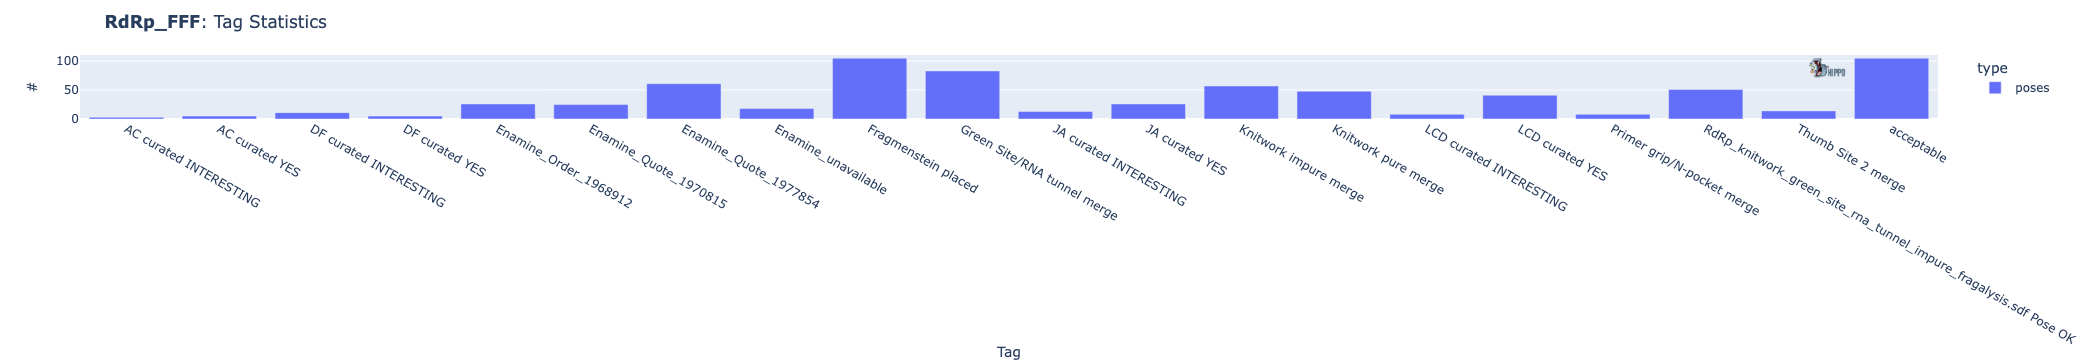

In [28]:
animal.plot_tag_statistics(poses=pset, compounds=pset.compounds, show_compounds=False)

In [29]:
pset.tags

{'AC curated INTERESTING',
 'AC curated YES',
 'DF curated INTERESTING',
 'DF curated YES',
 'Enamine_Order_1968912',
 'Enamine_Quote_1970815',
 'Enamine_Quote_1977854',
 'Enamine_unavailable',
 'Fragmenstein placed',
 'Green Site/RNA tunnel merge',
 'JA curated INTERESTING',
 'JA curated YES',
 'Knitwork impure merge',
 'Knitwork pure merge',
 'LCD curated INTERESTING',
 'LCD curated YES',
 'Primer grip/N-pocket merge',
 'RdRp_knitwork_green_site_rna_tunnel_impure_fragalysis.sdf Pose OK',
 'Thumb Site 2 merge',
 'acceptable'}

In [30]:
pset.compounds

{C × 67}

In [31]:
pset.write_sdf("../quotes/combined_jan2025_ordered.sdf", reference=False, inspirations=None,)

Output()

 DISK  Writing ../quotes/combined_jan2025_ordered.sdf...